<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER9%20%EC%B6%94%EC%B2%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 추천 시스템의 개요와 배경**

## **1.1. 추천 시스템의 개요**

본서를 참고하시기 바랍니다.

## **1.2. 온라인 스토어의 필수 요소, 추천 시스템**

추천 시스템은 온라인에서 매우 필수적인 기술입니다. 전자상거래, 콘텐츠 제공 등 다양한 온라인 업종에서 사용됩니다. 

아래 데이터는 추천 시스템을 구성하는 데 사용될 수 있습니다.

- 사용자가 무엇을 클릭했습니까?

- 사용자가 어떤 상품을 확인하거나 장바구니에 넣었습니까?

- 사용자가 어떤 상품을 구매했습니까?

- 사용자가 제품과 영화를 어떻게 평가했습니까?

- 사용자가 본인의 취향을 어떻게 정의했습니까?

이 외에도 여러 데이터가 사용될 수 있습니다.

## **1.3. 추천 시스템의 유형**

추천 시스템의 유형은 바로 아래 파트에서 다룹니다. **콘텐츠 기반 필터링**, **협업 필터링**(**최근접 이웃 협업 필터링**, **잠재 요인 협업 필터링**)이 있습니다. 대부분의 온라인 스토어에서는 잠재 요인 협업 필터링을 사용하지만 최근에는 개인화 특성을 더 강화할 목적으로 하이브리드 형식(콘텐츠 기반 필터링 + 협업 기반 필터링)을 사용하는 경우도 많아지는 추세입니다.

기실 **4.3. 확률적 경사 하강법을 이용한 행렬 분해** 파트까지는 아래 정리본보다 본서와 [링크1](https://hipster4020.tistory.com/109), [링크2](https://big-dream-world.tistory.com/61?category=470634)에 더 상세하게 설명되어 있습니다. 공부 흔적을 남길 목적이므로 핵심 내용만 정리하겠습니다.

# **2. 콘텐츠 기반 필터링 추천 시스템**

**콘텐츠 기반 필터링(Content Based Filtering)**은 사용자가 특정 아이템을 선호하는 경우에 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식입니다. 예컨대 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 배우, 감독, 영화 키워드 등 콘텐츠와 유사한 영화를 추천합니다. 

추천 시스템의 초창기에 주로 사용된 방식이지만 아이템 특성에 따라 여전히 많이 사용됩니다. 

# **3. 최근접 이웃 협업 필터링**

먼저 **협업 필터링(Collaborative Filtering)**에 대해 살펴볼 필요가 있습니다. 이 방식은 사용자 행동 양식(User Behavior)만을 토대로 추천합니다. 사용자 행동 양식이란 사용자가 아이템에 부여한 평점이나 상품 구매 이력 등을 예로 들 수 있습니다.

협업 필터링은 **사용자-아이템 평점 매트릭스(행렬)**처럼 축적된 사용자 행동 데이터를 토대로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating) 하는 것이 주목표입니다. 사용자-아이템 평점 행렬은 많은 아이템을 열로 가진 다차원 행렬이며, 사용자가 평점을 매기는 경우가 많지 않으므로 희소 행렬입니다. 예컨대 사용자(행, Row)가 아이템 1 ~ 4(열, Column) 중에 아이템 1과 아이템 3만 평점을 부여했다면 이 평점들을 토대로 아이템 4의 평점을 예측 평가 합니다.

**최근접 이웃 협업 필터링(Nearest Neighbor Collaborative Filtering)**은 **메모리(Memory) 협업 필터링**으로도 불립니다. 여기서 아래 두 기반으로 나뉩니다.

- **사용자 기반(User-User)**: 당신과 비슷한 고객들이 다음 상품도 선택했습니다.

- **아이템 기반(Item-Item)**: 이 상품을 선택한 다른 고객들은 다음 상품도 선택했습니다.

첫 번째로, 사용자 기반 방식은 특정 사용자와 비슷한 다른 사용자를 TOP-N으로 선정하고, 이 TOP-N 사용자가 좋아하는 아이템을 추천합니다. 특정 사용자와 다른 사용자 간 유사도(Similarity)를 측정하여 가장 높은 유사도를 가진 TOP-N 사용자를 추출하고 선호하는 아이템을 추천하는 것입니다. 예컨대 사용자 1 ~ 3 중에 사용자 1에게 아이템을 추천하는 경우 사용자 3보다 사용자 2가 사용자 1과 비슷하게 평점을 부여했다면, 사용자 2가 사용한 아이템을 사용자 1에게 추천합니다.

참고로 유사도 측정에는 텍스트 분석에 사용되는 코사인 유사도가 가장 많이 사용됩니다. 추천 시스템에 사용되는 데이터 또한 텍스트 데이터처럼 희소 행렬이기 때문입니다.

두 번째로, 아이템 기반 방식은 아이템이 가지는 속성과는 무관하게 사용자가 특정 아이템을 선호하는지 여부(평점을 어떻게 부여했는지)가 추천 기준입니다. 사용자 기반 방식과 다르게 사용자-아이템 평점 행렬의 행과 열이 반대 형태입니다. 행이 아이템이고 열이 사용자인 것입니다. 예컨대 여러 사용자가 부여한 아이템 1 ~ 3의 평점 중에 아이템 1과 2의 평점이 아이템 3의 평점보다 유사하다면 사용자에게 아이템 2를 추천합니다.

대개 두 방식 중에 아이템 기반 방식이 더 높은 정확도를 보이며 대부분 활용됩니다. 사용자 기반 방식은 거의 사용되지 않습니다. 비슷한 아이템을 선호하거나 선택한다고 모든 사용자의 취향이 비슷하다고 단정하기엔 근거가 미약합니다. 유행을 타거나 유명한 아이템의 경우 취향과 무관하게 많은 사용자가 선택하기도 합니다. 더욱이 사용자들이 평점을 부여한 아이템의 경우 대체적으로 평점을 부여한 빈도가 많지 않은데 이를 토대로 유사도를 비교하는 것은 다소 무리가 있습니다.

최근접 이웃 협업 필터링은 콘텐츠 기반 필터링처럼 추천 시스템의 초창기에 주로 사용된 방식이지만 아이템 특성에 따라 여전히 많이 사용됩니다. 특히 아마존은 아이템 기반의 최근접 이웃 협업 필터링을 추천 엔진으로 사용합니다.

# **4. 잠재 요인 협업 필터링**

## **4.1. 잠재 요인 협업 필터링의 이해**

**잠재 요인 협업 필터링(Latent Factor Collaborative Filtering)**은 사용자-아이템 평점 행렬에 있는 잠재 요인을 추출하여 추천 예측을 수행하는 기법입니다. 잠재 요인은 **행렬 분해(Matrix Factorization)** 기법을 활용하여 대규모 다차원 행렬을 **SVD(Singular Value Decomposition, 특이값 분해)** 같은 차원 감소 기법으로 분해하는 과정에서 추출합니다. 즉 잠재 요인 협업 필터링은 행렬 분해 기법을 기반으로 합니다.

잠재 요인을 명확하게 정의내릴 순 없지만 이 잠재 요인을 기반으로 사용자-아이템 평점 행렬을 저차원 밀집 행렬인 **사용자-잠재 요인 행렬**과 아이템-잠재 요인 매트릭스의 전치 행렬인 **잠재 요인-아이템 행렬**로 분해할 수 있습니다. 두 행렬을 내적하여 새로운 예측 사용자-아이템 평점 행렬 데이터를 생성하고 사용자가 평점을 부여하지 않은 아이템에 예측 평점을 부여하는 것이 잠재 요인 협력 필터링의 핵심입니다.

행렬 분해를 거쳐 추출되는 잠재 요인이 무엇을 의미하는지는 알 수 없습니다. 다만 영화 평점 기반의 사용자-아이템 평점 행렬이라면 장르별 특성 선호도 정도로 가정할 수 있습니다. 사용자-잠재 요인 행렬은 영화 장르 선호도, 아이템-잠재 요인 행렬은 장르별 특성값으로 정의할 수 있습니다. 본서와 [링크](https://ariz1623.tistory.com/228)에서 이 가정에 대하여 그림과 함께 메커니즘을 설명합니다.

## **4.2. 행렬 분해의 이해**

행렬 분해와 예측 평점 도출에 대한 원리는 본서와 [링크](https://big-dream-world.tistory.com/69)를 참고하시기 바랍니다.

참고로 행렬 분해는 주로 SVD를 이용하지만 Null 값이 존재하는 행렬에는 적용할 수 없습니다. 이런 경우 **SGD(Stochastic Gradient Descent, 확률적 경사 하강법)**나 **ALS(Alternating Least Squares, 교대 최소 제곱법)**를 사용하여 SVD를 수행합니다.

## **4.3. 확률적 경사 하강법을 이용한 행렬 분해**

확률적 경사 하강법을 이용한 행렬 분해의 원리는 본서와 [링크](https://big-dream-world.tistory.com/69)를 참고하시기 바랍니다.

일반적으로 사용자-아이템 평점 행렬은 행렬 분해를 위해 단순히 예측 오류값의 최소화와 학습 시 과적합을 피하기 위해 규제를 반영한 비용 함수를 적용합니다. L2 규제를 반영하여 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고 P 행렬과 Q 행렬에 적절한 값을 반복적으로 업데이트하면서 최적화된 예측 R 행렬을 구하는 방식이 SGD 기반 행렬 분해입니다.만족할 만한 오류값을 가질 때까지 작업을 반복하면서 P와 Q 값을 근사화합니다.

SGD를 토대로 행렬 분해를 수행해 보겠습니다. 분해할 원본 행렬 R을 행렬 P와 행렬 R로 분해하고 다시 $P \times Q.T$로 예측 행렬을 생성하겠습니다. 수행 과정이 다소 복잡해 보일 수 있으므로 가볍게 살피고 넘어가도 좋습니다. 

In [ ]:
import numpy as np

# 원본 행렬 R을 생성합니다. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
# 행은 사용자, 열은 아이템으로 지정합니다.
num_users, num_items = R.shape
# 잠재 요인의 차원 K는 3으로 설정합니다. 
K=3
# 분해 행렬인 P와 Q의 크기를 지정하고 정규분포를 가진 무작위 값으로 부여합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

원본 행렬 R과 예측 행렬간 오차를 도출하는 새 함수를 선언하겠습니다. 이 함수는 원본 행렬 R에서 Null 값이 아닌 행렬 값의 인덱스를 추출하여 이 인덱스에 있는 행렬 R의 값과 분해된 행렬 P와 Q를 이용하여 다시 조합된 예측 행렬 값의 RMSE 값을 반환합니다.

In [ ]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 분해된 행렬 P와 Q.T를 내적하여 예측 행렬 R을 도출합니다.
    full_pred_matrix = np.dot(P, Q.T)
    
    # 원본 행렬 R에서 Null 값이 아닌 값의 인덱스를 추출하여
    # 원본 행렬 R과 예측 행렬의 RMSE를 추출합니다.
    x_non_zero_index = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_index = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_index, y_non_zero_index]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_index, y_non_zero_index]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

SGD 기법을 기반으로 행렬 분해를 수행하겠습니다. 먼저 행렬 R에서 Null 값을 제외한 데이터의 행렬 인덱스를 추출합니다.

In [ ]:
# R > 0인 행 인덱스, 열 인덱스, 값을 `non_zeros` 리스트에 저장합니다. 
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

# SGD를 반복해서 업데이트할 횟수를 지정합니다.
steps = 1000
# SGD의 학습률을 지정합니다.
learning_rate = 0.01
# L2 규제 계수를 지정합니다.
r_lambda = 0.01

# SGD 방식을 토대로 행렬 P와 행렬 Q를 계속 업데이트합니다. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값을 구합니다.
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # 규제를 반영한 SGD 업데이트를 적용합니다.
        P[i, :] = P[i, :] + learning_rate * (eij * Q[j, :] - r_lambda * P[i,:])
        Q[j, :] = Q[j, :] + learning_rate * (eij * P[i, :] - r_lambda * Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    # 50회 반복할 때마다 오류 값을 출력합니다.
    if (step % 50) == 0:
        print("# iteration step:", step, "| rmse:", rmse)

# iteration step: 0 | rmse: 0.016410959588961445
# iteration step: 50 | rmse: 0.01637308966218993
# iteration step: 100 | rmse: 0.016333882336881784
# iteration step: 150 | rmse: 0.016293661274599174
# iteration step: 200 | rmse: 0.01625272572302336
# iteration step: 250 | rmse: 0.016211338984681307
# iteration step: 300 | rmse: 0.016169725523756753
# iteration step: 350 | rmse: 0.016128072491623933
# iteration step: 400 | rmse: 0.016086533303745463
# iteration step: 450 | rmse: 0.016045231961723017
# iteration step: 500 | rmse: 0.016004267423347165
# iteration step: 550 | rmse: 0.015963717671935662
# iteration step: 600 | rmse: 0.01592364333325902
# iteration step: 650 | rmse: 0.015884090797210332
# iteration step: 700 | rmse: 0.01584509485896164
# iteration step: 750 | rmse: 0.015806680922219037
# iteration step: 800 | rmse: 0.01576886681829548
# iteration step: 850 | rmse: 0.015731664296432853
# iteration step: 900 | rmse: 0.0156950802377121
# iteration step: 950 | rmse: 0.015659117

예측 행렬을 생성해 보겠습니다.

In [ ]:
pred_matrix = np.dot(P, Q.T)
print('원본 행렬:\n', R)
print()
print('예측 행렬:\n', np.round(pred_matrix, 3))

원본 행렬:
 [[ 4. nan nan  2. nan]
 [nan  5. nan  3.  1.]
 [nan nan  3.  4.  4.]
 [ 5.  2.  1.  2. nan]]

예측 행렬:
 [[3.991 1.171 1.266 2.    1.649]
 [6.288 4.978 0.896 2.983 1.003]
 [6.401 0.866 2.987 3.978 3.986]
 [4.969 2.005 1.006 2.013 1.258]]


두 행렬의 값은 큰 차이가 없습니다. Null 값은 예측값으로 채워졌습니다.

# **5. 콘텐츠 기반 필터링 실습 - TMDB 5000 영화 데이터 세트**

캐글의 [TMDB 5000 영화 데이터 세트](https://www.kaggle.com/tmdb/tmdb-movie-metadata)에서 파일을 다운로드하여 콘텐츠 기반 필터링을 실습해 보겠습니다. 참고로 이번 파트부터 작성하는 예제 코드들은 최적화나 수행 속도에 대한 고려 없이 설명만을 목적으로 한 것이므로 추후에 보완이 필요합니다.

## **5.1. 장르 속성을 이용한 영화 콘텐츠 기반 필터링**

콘텐츠 기반 필터링은 사용자가 특정 영화를 감상하고 그 영화를 좋아했다면 비슷한 특성이나 속성, 구성 요소 등을 가진 다른 영화를 추천하는 방식입니다. 예컨대 액션 장르인 영화 A를 재미있게 봤다면 해당하는 장르 중에 높은 평점을 받은 다른 영화를 추천하거나 영화 A를 제작한 감독의 다른 영화를 추천합니다. 즉, 다양한 콘텐츠(장르, 감독, 배우, 평점, 키워드, 영화 설명)는 영화(아이템, 상품, 서비스 등) 간 유사성을 판단하는 기준입니다.

콘텐츠 기반 필터링 추천 시스템을 영화 장르 속성을 기반으로 생성해 보겠습니다. 장르 피처 값의 유사도를 비교하여 높은 평점을 가진 영화를 추천하는 시스템입니다.

## **5.2. 데이터 로딩 및 가공**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

movies = pd.read_csv('/content/gdrive/MyDrive/tmdb_5000/tmdb_5000_movies.csv')
display(movies.head(3))
print(movies.shape)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


(4803, 20)


콘텐츠 기반 필터링 추천 분석에 적합한 피처만 추출하여 새 데이터프레임으로 정리하겠습니다.

In [ ]:
movies_df = movies[['id', 'title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview']]
movies_df.head(3)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...


결측치를 확인해 보겠습니다.

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [ ]:
movies_df.isnull().sum()

id              0
title           0
genres          0
vote_average    0
vote_count      0
popularity      0
keywords        0
overview        3
dtype: int64

In [ ]:
movies_df[movies_df['overview'].isnull()]

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
2656,370980,Chiamatemi Francesco - Il Papa della gente,"[{""id"": 18, ""name"": ""Drama""}]",7.3,12,0.738646,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",NaN
4140,459488,"To Be Frank, Sinatra at 100","[{""id"": 99, ""name"": ""Documentary""}]",0.0,0,0.050625,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",NaN
4431,292539,Food Chains,"[{""id"": 99, ""name"": ""Documentary""}]",7.4,8,0.795698,[],NaN


결측치는 'overview' 피처에 3개만 존재합니다. 크게 중요하지 않을 가능성이 높으므로 별도로 처리하지는 않겠습니다. 아울러 다른 피처들은 일견 결측치가 존재하지 않는 것으로 확인되지만 위 데이터프레임에서 행 4431의 'keywords'의 값은 '[]'이므로 무의미한 값이라고 볼 수 있습니다. 일단 별도로 처리하지 않고 넘어가겠습니다.

다만 피처 몇 가지를 살펴볼 필요는 있습니다. 피처 'genres'와 'keywords'는 한꺼번에 여러 값을 표현하기 위해 리스트에 딕셔너리(dict)가 포함된 형태로 값을 가집니다. 예컨대 'genres'에 여러 값이 포함된 이유는 특정 영화의 장르가 한 종류일 수도 있고 여러 종류일 수도 있기 때문입니다. 데이터 분석을 위해 적합한 형태로 가공해야 합니다.

우선 영화 하나만 값을 펼쳐서 확인해 보겠습니다.

In [ ]:
pd.set_option('max_colwidth', 1000)
movies_df[['title', 'genres', 'keywords']][:1]

,title,genres,keywords
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]"


'name'을 키(key)로 하여금 값을 추출할 수 있는 형태입니다. 다만 단순한 문자열이므로 이 형태에서는 추출할 수는 없습니다. 리스트 객체로 변형해야 원하는 값을 추출할 수 있습니다. `ast` 모듈의 `literal_eval()` 메서드를 사용하여 문자열을 리스트 객체로 변형하겠습니다.


In [ ]:
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

두 피처의 'name' 키를 사용하여 값만 추출하고 피처에 저장하겠습니다.

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])

In [ ]:
pd.set_option('max_colwidth', 1000)
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]"


## **5.3. 장르 콘텐츠 유사도 측정**

'genres' 피처는 리스트에 여러 장르가 포함된 형태입니다. 장르별 유사도를 측정하는 가장 간단한 방법은 이 피처 값을 문자열로 변환하여 `CountVectorizer` 클래스로 피처 벡터화를 수행하고 도출된 행렬을 코사인 유사도로 비교하는 것입니다. 이 과정을 요약하면 아래와 같습니다.

1. 문자열로 변환한 'genres' 피처를 카운트 기반으로 피처 벡터화 하여 행렬로 바꿉니다.

1. 이 행렬을 코사인 유사도로 비교합니다. 이를 위해 데이터 세트의 레코드별로 다른 레코드와 장르에서 코사인 유사도 값을 가지는 객체를 생성합니다.

1. 장르 유사도가 높은 영화 중에 평점이 높은 순으로 추천합니다.

먼저 'genres' 피처를 문자열로 변환하고 피처 벡터화를 수행하겠습니다.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

movies_df['genres_literal'] = movies_df['genres'].apply(lambda x: (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1, 2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


이 행렬에 `cosine_similarity()` 메서드로 코사인 유사도를 계산하면 행별(레코드별) 유사도를 가지며, 다시 말하면 `movies_df` 데이터프레임의 레코드별 장르 유사도 값을 가지는 것입니다. 코사인 유사도를 계산하고 레코드를 3개만 출력해 보겠습니다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:3])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]
 [0.4472136  0.4        1.         ... 0.         0.         0.        ]]


코사인 유사도 결과가 담긴 `genre_sim` 객체를 토대로 개별 레코드에 대해 가장 장르 유사도가 높은 순으로 다른 레코드를 추출해야 합니다. 이를 수행할 방법은 `genre_sim` 객체의 기준 레코드별로 비교 대상인 레코드의 유사도 값이 높은 순으로 정렬된 행렬의 인덱스 값을 추출하는 것입니다. 값이 높은 순으로 정렬된 비교 대상 레코드의 유사도 값을 추출하는 것이 아니라 비교 대상 레코드의 인덱스를 추출하는 것입니다. `argsort()[:, ::-1]` 형식으로 오름차순 정렬을 수행하여 이를 구현하겠습니다.

In [ ]:
genre_sim_sorted_index = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_index)

[[   0 3494  813 ... 3038 3037 2401]
 [ 262    1  129 ... 3069 3067 2401]
 [   2 1740 1542 ... 3000 2999 2401]
 ...
 [4800 3809 1895 ... 2229 2230    0]
 [4802 1594 1596 ... 3204 3205    0]
 [4802 4710 4521 ... 3140 3141    0]]


첫 번째 행인 `[   0 3494  813 ... 3038 3037 2401]`에서 `0`은 자신인 레코드이고 `3494`는 가장 유사한 레코드인 3494번 레코드입니다. `813`은 그 다음으로 유사한 레코드인 813번 레코드입니다. 이렇게 도출한 레코드 인덱스를 이용하면 특정 레코드와 코사인 유사도가 높은 레코드를 추출할 수 있습니다.

## **5.4. 장르 콘텐츠 필터링을 이용한 영화 추천**

장르 유사도를 기반으로 영화를 추천하는 함수를 선언하겠습니다. 인자를 전달하여 함수를 실행하면 추천 영화 정보를 가진 데이터프레임을 반환합니다.

In [ ]:
# `df`는 영화 데이터프레임, `sorted_indexes`는 레코드별 장르 코사인 유사도 인덱스를 가지는 객체,
# `title_name`은 고객이 선정한 추천 기준인 영화 제목, `top_n`은 추천할 영화 건수입니다. 
def find_sim_movie(df, sorted_indexes, title_name, top_n=0):
    # `df` 인자(영화 데이터프레임)에서 'title' 피처에
    # `title_name` 인자(추천 기준 영화 제목)가 포함된 데이터프레임을 출력합니다.
    title_movie = df[df['title'] == title_name]

    # 'title_name' 인자(추천 기준 영화 제목)가 포함된 데이터프레임의 인덱스 객체를 `ndarray` 형태로 반환합니다.
    title_index = title_movie.index.values
    # `sorted_index` 인자(코사인 유사도 인덱스 개체)에서 유사도가 높은 순으로
    # `top_n` 인자(추천할 영화 개수)만큼 인덱스를 추출합니다.
    similar_indexes = sorted_indexes[title_index, :(top_n)]

    # 추출된 `top_n` 인자의 인덱스를 출력합니다. 2차원 데이터입니다.
    print(similar_indexes)
    # 데이터프레임에서 인덱스로 사용하기 위해 1차원 배열로 변경합니다.
    similar_indexes = similar_indexes.reshape(-1)

    return df.iloc[similar_indexes]

영화 'The Godfather'와 유사한 영화 10개를 추천해 보겠습니다.

In [ ]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_index, 'The Godfather', 10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


'The Godfather: Part II'가 최선으로 추천되었습니다. 'GoodFellas'도 유사한 영화입니다. 그러나 'Light Sleeper', 'Mi America', 'Kids' 등의 영화는 'The Godfather'를 선호하는 사용자에게 추천하기엔 적합하지 않은 영화라고 합니다. 평점이 낮거나 심각하게 낮은 경우도 보입니다. 개선될 필요가 있습니다.

이번에는 더 많은 후보군을 선정하여 평점에 따라 필터링해서 최종적으로 추천하는 방식으로 바꿔보겠습니다. 평점 정보를 나타내는 'vote_average' 피처를 적용하겠습니다. 이 피처는 여러 관객이 평가한 평점을 평균한 것이므로 평점을 부여한 관객 수가 많고 적음에 따라 왜곡 정도가 결정됩니다. 'vote_count' 피처를 확인하여 평균 평점에 대한 왜곡 정도를 살펴볼 필요가 있습니다. 오름차순으로 10개만 출력해 보겠습니다.

In [ ]:
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


평점은 높지만 평가 횟수는 적은 영화를 확인할 수 있습니다. 왜곡된 평점 데이터는 평점에 평가 횟수를 반영하여 보정할 수 있습니다. 영화 평점 사이트인 IMDB에서는 평가 횟수에 대한 가중치가 부여된 평점 방식(Weighted Rating)을 사용합니다. 가중 평점 공식은 아래와 같습니다.

$$Weighted Rating = (\frac{v}{v+m} * R) + (\frac{m}{v+m} * C)$$

- $v$: 개별 영화의 평점 부여 횟수('vote_count' 피처에 해당함)

- $m$: 평점을 부여하기 위한 최소 투표 횟수

- $R$: 개별 영화의 평균 평점('vote_average' 피처에 해당함)

- $C$: 전체 영화에 대한 평균 평점(=`movies_df['vote_average'].mean()`)

$m$은 평점 부여 횟수에 따른 가중치를 직접 조절하는 역할을 합니다. 값을 높이면 평점 부여 횟수가 많은 영화에 더 큰 가중 평점을 부여합니다.

먼저 변수 $m$과 $C$를 만들어 보겠습니다. 변수 $m$은 전체 투표 횟수에서 상위 60%에 해당하는 횟수로 저장하겠습니다.

In [ ]:
m = movies_df['vote_count'].quantile(0.6)
C = movies_df['vote_average'].mean()
print('m:', round(m, 3), 'C:', round(C, 3))

m: 370.2 C: 6.092


기존 평점을 가중 평점으로 변환하는 새 함수를 선언하여 'weghted_vote' 피처를 생성하겠습니다.

In [ ]:
m = movies_df['vote_count'].quantile(0.6)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']

    return (v/(v+m)) * R + (m/(m+v)) * C

In [ ]:
movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)

가중 평점이 높은 상위 10개만큼 출력해 보겠습니다.

In [ ]:
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values(
    'weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


마지막으로 가중 평점에 기반하여 추천하는 최종 함수를 선언하겠습니다. 위에서 선언했던 `find_sim_movie()`장르 유사성이 높은 영화를 `top_n` 인자의 2배만큼 후보군으로 선정하고 가중 평점이 높은 순으로 `top_n` 인자만큼 추출하는 함수입니다.

In [ ]:
def find_sim_movie(df, sorted_indexes, title_name, top_n=0):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values

    similar_indexes = sorted_indexes[title_index, :(top_n * 2)]
    similar_indexes = similar_indexes.reshape(-1)
    # 기준 영화의 인덱스는 제외합니다.
    similar_indexes = similar_indexes[similar_indexes != title_index]

    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

'The Godfather'와 유사한 영화를 추천해 보겠습니다.

In [ ]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_index, 'The Godfather', 10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


본서에서는 이전보다 'The Godfather'와 유사한 영화를 추천했다고 명시하고 있습니다. 

다만 장르만으로는 영화의 요소나 분위기, 개인 취향을 반영하기엔 역부족입니다. 예컨대 선호하는 영화배우나 감독이 영화 결정 요인이 될 수도 있기 때문입니다. 따라서 콘텐츠 기반 필터링 추천 시스템은 다른 콘텐츠도 기반으로 삼아 고도화할 필요가 있습니다. 본서에서는 이 추천 시스템을 고도화하는 추가적인 과정을 다루고 있지 않습니다.

# **6. 아이템 기반 최근접 이웃 협업 필터링 실습**

사용자 기반과 아이템 기반 중 추천 정확도가 더 높은 아이템 기반으로 협업 힐터링을 구현해 보겠습니다. [Grouplens 사이트의 Movielens 데이터 세트](https://grouplens.org/datasets/movielens/latest/)를 사용하겠습니다.


## **6.1. 데이터 가공 및 변환**

데이터를 준비하겠습니다. 먼저 `movies.csv` 파일을 확인해 보겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np

movies = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/movies.csv')
print(movies.shape)
movies.head(3)

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


영화(아이템)와 관련된 데이터이며 결측치는 확인되지 않습니다. 피처 'genres'는 장르를 의미하며 `|`로 나뉩니다.

다음은 `ratings.csv` 파일을 확인해 보겠습니다.

In [ ]:
ratings = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv')
print(ratings.shape)
ratings.head(3)

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


관객(사용자)와 관련된 데이터이며 결측치는 확인되지 않습니다. 피처 4개 중에 'timestamp'는 분석 작업에 불필요한 피처로 사료됩니다.

협업 필터링은 `ratings` 데이터프레임처럼 사용자와 아이템 간 평점(또는 다른 유형의 액션)에 기반한 추천 시스템입니다. 이를 구현하려면 `ratings` 데이터프레임의 행을 사용자('userId' 피처)로, 열을 모든 영화('movieId'피처)로, 값은 평점('rating' 피처)으로 재구성해야 합니다. 판다스의 `pivot_table()` 메서드를 적용하여 행 레벨을 열(피처) 레벨로 바꾸겠습니다.

In [ ]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
print(ratings_matrix.shape)
ratings_matrix.head(3)

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


영화명이 모두 숫자로 부여되어 있습니다. 'movieId'의 숫자 값에 대응하는 영화명은 `movies` 데이터프레임에 정리되어 있습니다. 두 데이터프레임(`movies`와 `ratings`)을 조인하여 'movieId'의 숫자 값에 대응하는 'title' 피처 값을 포함시키겠습니다.

In [ ]:
rating_movies = pd.merge(ratings, movies, on='movieId')
rating_movies.head(3)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


'title' 피처로 피벗하여 `ratings_matrix` 데이터프레임을 다시 구성하겠습니다.

In [ ]:
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`NaN` 값이 많습니다. 사용자가 평점을 부여하지 않은 영화도 열로 변환되었기 때문입니다. 평점의 최솟값과 최댓값을 확인하여 몇 점 척도인지 확인해 보겠습니다.


In [ ]:
print(ratings['rating'].min(), ratings['rating'].max())

0.5 5.0


5점 척도입니다. `NaN` 값은 0점을 의미하는 `0`으로 바꾸겠습니다.

In [ ]:
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **6.2. 영화 간 유사도 산출**

변환을 마친 `ratings_matrix` 행렬을 사용하여 영화 간 유사도를 측정해 보겠습니다. 유사도는 코사인 유사도를 사용하겠습니다. 주목할 점은 코사인 유사도를 측정할 때 사용할 `cosine_similarity()` 메서드는 행을 기준으로 서로 다른 행을 비교하여 유사도를 산출합니다. `ratings_matrix` 행렬에 그대로 적용하면 'userId' 피처가 기준이기 때문에 사용자 간 유사도를 산출하게 됩니다. 영화 간 유사도를 산출하려면 'title' 피처를 행으로 전치할 필요가 있습니다. 행과 열을 전치하여 행렬을 재구성하겠습니다. 



In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`cosine_similarity()` 메서드를 적용해 보겠습니다. 이 메서드를 적용하면 넘파이 배열이 출력됩니다. 이 넘파이 배열을 데이터프레임으로 만들고 인덱스와 칼럼을 'title'로 채우겠습니다. 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
item_similarity_df = pd.DataFrame(data=item_similarity, index=ratings_matrix.columns,
                                  columns=ratings_matrix.columns)
print(item_similarity_df.shape)
item_similarity_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


영화 대부('Godfather, The (1972)')와 유사도가 높은 순으로 출력해 보겠습니다.

In [ ]:
item_similarity_df['Godfather, The (1972)'].sort_values(ascending=False)[1:6]

title
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

주목할 점은 콘텐츠 기반 필터링과 달리 장르가 다른 영화도 유사도가 높다는 점입니다.

## **6.3. 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천**

위에서 만든 아이템 기반 영화 유사도 데이터는 평점을 기준으로 영화 유사도를 생성하여 영화를 추천했습니다. 다만 개인 취향까지 반영하지는 못했습니다. 이번에는 이 영화 유사도 데이터를 사용하여 최근접 이웃 협업 필터링으로 개인에게 최적화된 영화를 추천하도록 구현해 보겠습니다. 개인에게 최적화된 영화를 추천하는 것은 개인이 아직 관람하지 않은 영화를 추천하는 것을 의미합니다. 아직 관람하지 않은 영화에 대해 아이템 유사도와 기존에 관람한 영화의 평점 데이터를 기반으로 새롭게 모든 영화의 예측 평점을 계산하고 높은 예측 평점을 가진 영화를 추천하는 방식입니다.

아이템 기반의 협업 필터링에서 개인화된 예측 평점은 아래 수식으로 산출할 수 있습니다.

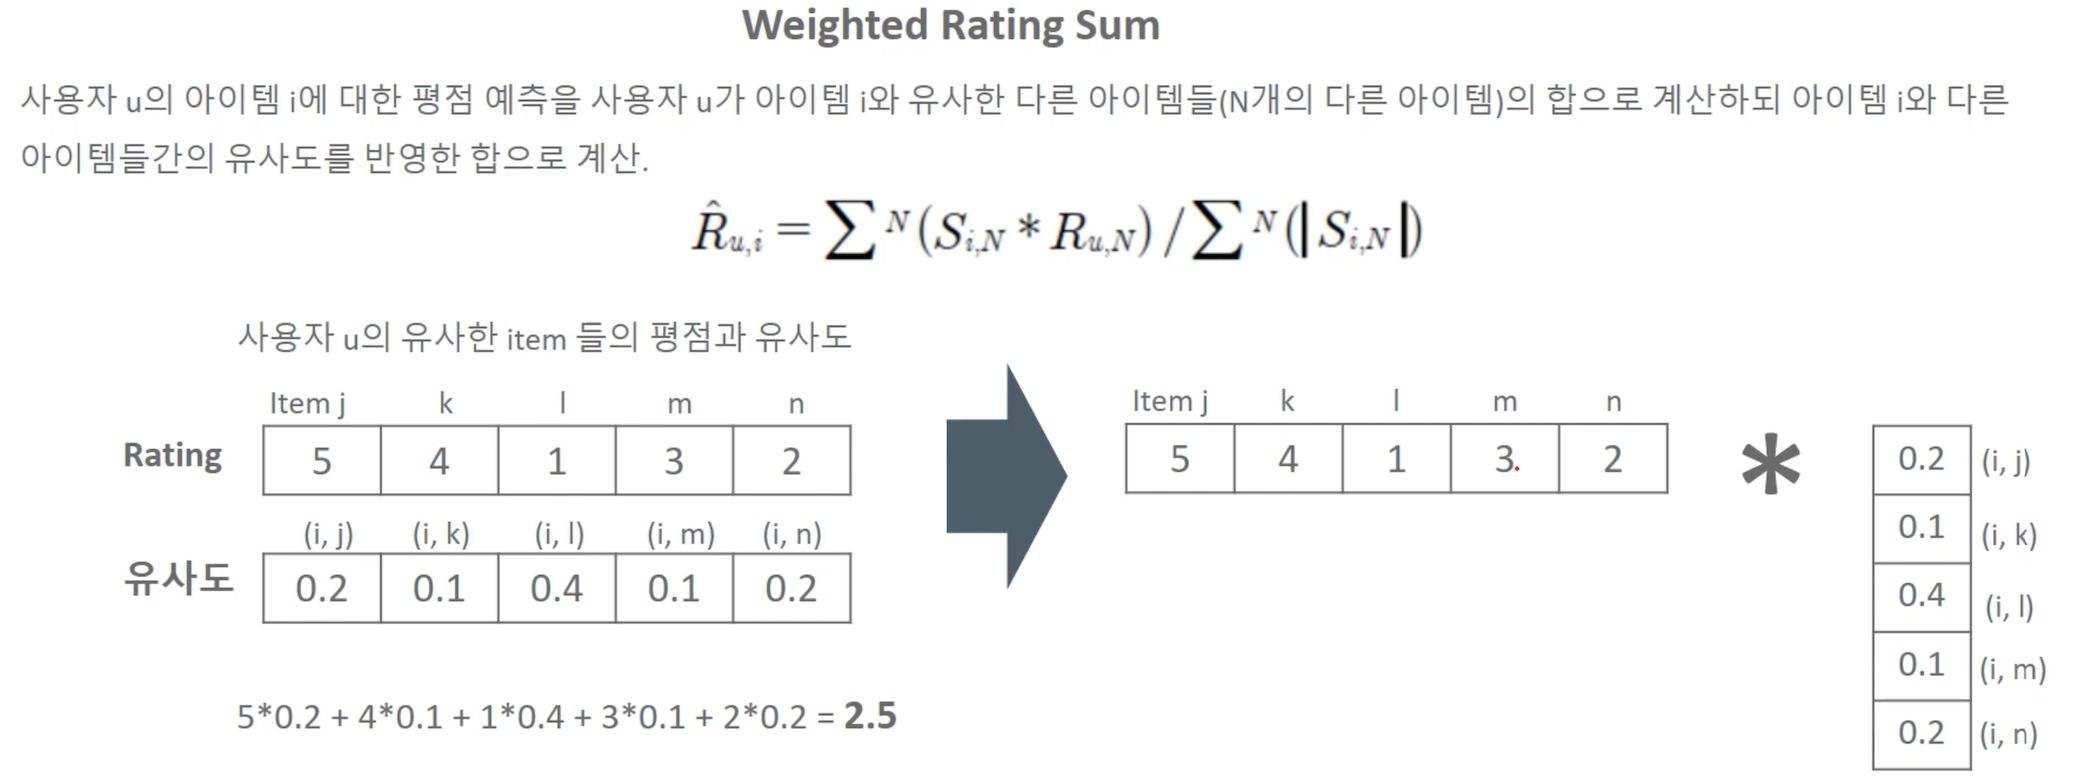


- $\hat{R}_{u, i}$: 사용자 $u$, 아이템 $i$의 개인화된 예측 평점 값

- $N$: 아이템 $i$의 최근접 이웃 범위 계수(item neighbor)

- $S_{i, N}$: 아이템 $i$와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터

- $R_{u, N}$: 사용자 $u$의 아이템 $i$와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터

여기서 $N$은 특정 아이템과 유사도가 가장 높은 Top-N개의 다른 아이템을 추출하는 데 사용됩니다.

일단 $N$의 범위를 제약하지 않고 모든 아이템으로 가정하고 예측 평점을 구하는 로직을 만들고, Top-N 아이템을 기반으로 협업 필터링을 수행하도록 로직을 변경하겠습니다. 위에서 사용한 `item_similarity_df` 데이터프레임과 `ratings_matrix` 데이터프레임을 사용하여 사용자별로 최적화된 평점 스코어를 예측하는 함수를 선언하겠습니다. 인자는 사용자-영화 평점 넘파이 행렬(`ratings_matrix`), 영화 간 유사도를 가진 넘파이 행렬(`item_similarity_df`)을 받으며 이를 토대로 위 수식(개인화된 예측 평점)을 적용하여 개인화된 예측 평점을 산출합니다. 참고로 $N$ 범위를 제약하지 않는 경우 사용자별 영화 예측 평점인 $\hat{R}_{u, i}$는 사용자 $u$의 모든 영화에 대한 실제 평점과 영화 $i$의 다른 모든 영화와의 코사인 유사도를 벡터 내적 곱을 수행한 값을 정규화를 위해 $\sum N(|S_{i, N}|$로 나눈 것입니다. 이를 구현한 코드는 아래와 같습니다.

In [ ]:
def predict_rating(ratings_arr, item_similarity_arr):
    ratings_pred = ratings_arr.dot(item_similarity_arr) / np.array([np.abs(item_similarity_arr).sum(axis=1)])

    return ratings_pred

`ratings_arr.dot(item_similarity_arr)`는 $\sum N(S_{i, N} * R_{u, N})$을 의미하고, `np.array([np.abs(item_similarity_arr).sum(axis=1)])`는 $\sum N(|S_{i, N}|)$을 의미합니다. 이 함수를 호출하여 개인화된 예측 평점을 산출해 보겠습니다. 

In [ ]:
# 두 데이터프레임을 넘파이 행렬로 변환해서 입력해야 합니다.
ratings_pred = predict_rating(ratings_matrix.values, item_similarity_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                   columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


예측 평점은 사용자별 영화의 실제 평점(`ratings_matrix`)과 영화의 코사인 유사도(`itme_similarity_df`)를 내적한 값입니다. 따라서 기존에 영화를 관람하지 않아서 0점이 부여됐던 실제 영화 평점이 예측을 수행하면 값이 많이 부여됩니다. 또한 예측 평점이 실제 평점보다 작을 수도 있습니다. 이는 내적 결과를 코사인 유사도 벡터 합으로 나누었기 때문입니다.

이 예측 평점이 원래의 실제 평점과 얼마나 차이가 있는지 확인해 보겠습니다. 예측 평가 지표는 MSE를 적용합니다. 참고로 MSE를 측정할 때 유의할 점이 있습니다. 사용자가 영화 평점을 부여하지 않은 경우 앞에서는 평점을 0으로 부여했습니다. 다만 앞에서 개인화된 예측 점수는 평점을 주지 않은 영화에도 아이템 유사도를 토대로 평점을 예측했습니다. 따라서 실제 평점과 예측 평점 간 차이는 평점이 부여된 데이터에 대해서만 오차 정도를 측정해야 합니다. MSE를 산출하는 새 함수를 선언하고 결과를 확인하겠습니다.

In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # 평점이 부여된 영화만 추출합니다.
    # 다차원 array를 1차원 array로 변환하여 `mean_squared_error()` 메서드에 적용합니다. 
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [ ]:
print('아이템 기반 모든 최근접 이웃 MSE:', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 MSE: 9.895354759094706


실제 값과 예측 값은 스케일이 달라서 MSE가 클 수도 있습니다. 물론 중요한 포인트는 MSE를 감소시켜야 한다는 것입니다.

위에서 선언한 `predict_rating()` 함수는 사용자별 영화의 예측 평점을 산출하기 위해 해당 영화와 다른 모든 영화 간 유사도 벡터를 적용합니다. 많은 영화의 유사도 벡터를 이용하면서 상대적으로 평점 예측이 떨어졌습니다. 평점 예측의 정확도를 제고하기 위해 특정 영화와 가장 비슷한 유사도를 가진 영화에 대해서만 유사도 벡터를 적용하는 함수를 새로 선언하겠습니다. 이 함수는 `predict_rating()` 함수와 유사한 형태지만 N 인자를 받으므로 TOP-N 유사도를 가진 영화 유사도 벡터만 예측 값을 계산하는 데 적용합니다. 다만 이렇게 계산하려면 개별 예측 값을 구하기 위해 행과 열 별로 루프를 반복하면서 TOP-N 유사도 벡터를 계산하기 때문에 수행 시간이 오래 걸립니다. 데이터가 크면 클수록 수행 시간이 더 오래 걸릴 것입니다.

In [ ]:
def predict_rating_top_similarity(ratings_arr, item_similarity_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬로 초기화합니다.
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기(`shape[1]`)만큼 루프를 수행합니다.
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 인덱스를 반환합니다.
        top_n_items = [np.argsort(item_similarity_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산합니다.
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_similarity_arr[col, :][top_n_items].\
                             dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_similarity_arr[col, :][top_n_items]))

    return pred

이 함수를 적용하여 예측 평점을 계산하고 실제 평점 간 MSE를 산출해 보겠습니다. 계산된 예측 평점 넘파이 행렬은 데이터프레임으로 다시 구성하겠습니다.

In [ ]:
ratings_pred = predict_rating_top_similarity(ratings_matrix.values, item_similarity_df.values, n=20)
print('아이템 기반 최근접 TOP-20 이웃 MSE:', get_mse(ratings_pred, ratings_matrix.values))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


아이템 기반 최근접 TOP-20 이웃 MSE: 3.6949827608772314


In [ ]:
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                   columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.220798,0.0,0.0,1.677291,0.284372
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


MSE가 기존보다 많이 좋아졌습니다.

userId가 9인 사용자에게 영화를 추천해 보겠습니다. 일단 어떤 영화를 선호하는지 확인하고 평점을 부여한 영화를 평점이 높은 순으로 나열해 보겠습니다.

In [ ]:
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

이 사용자에게 아이템 기반 협업 필터링을 토대로 영화를 추천해 보겠습니다. 사용자가 평점을 부여한 영화를 제외하고 추천하도록 평점을 주지 않은 영화를 리스트 객체로 반환하는 새 함수를 선언하겠습니다.

In [ ]:
def get_unseen_movies(ratings_matrix, userId):
    # `userId` 인자로 지정된 사용자에 대하여 모든 영화 정보를 추출하고 시리즈로 반환합니다.
    # 영화명을 인덱스로 가지는 시리즈 객체입니다.
    user_rating = ratings_matrix.loc[userId, :]

    # `user_rating` 객체의 값이 0보다 크면 기존에 관람한 영화입니다. 
    # 기존에 관람한 영화의 인덱스를 추출하여 리스트 객체로 저장합니다.
    already_seen = user_rating[user_rating > 0].index.tolist()
    # 모든 영화명을 리스트 객체로 저장합니다.
    movies_list = ratings_matrix.columns.tolist()

    # 기존에 관람한 영화 인덱스를 가진 객체인 `already_seen`에 해당하는 영화는
    # 모든 영화명을 가진 객체인 `movies_list`에서 제외합니다.
    unseen_list = [movie for movie in movies_list if movie not in already_seen]

    return unseen_list

사용자가 평점을 부여하지 않은 추천 대상 영화 정보와 `predict_rating_top_similarity()` 함수를 통해 산출한 사용자별 아이템 유사도에 기반한 예측 평점 데이터 세트를 사용하여 최종적으로 영화를 추천하는 새 함수를 선언하겠습니다. 이 함수는 예측 평점 데이터프레임과 추천할 사용자의 Id, 추천 후보 영화 리스트, 추천 상위 영화 개수를 인자로 받아서 사용자가 선호할 만한 가장 높은 예측 평점을 받은 영화를 추천합니다.

In [ ]:
def recommend_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 데이터프레임에서 사용자 id 인덱스와 `unseen_list`에 저장된 영화명 칼럼을 추출하여
    # 예측 평점이 높은 순으로 정렬합니다.
    recommend_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    
    return recommend_movies

선언한 모든 함수를 사용하여 최종적으로 영화 추천을 수행하겠습니다.

In [ ]:
# 사용자가 관람하지 않은 영화명을 추출합니다.
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 최근접 이웃 협업 필터링으로 영화를 추천합니다.
recommend_movies = recommend_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이터를 데이터프레임으로 구성합니다.
recommend_movies = pd.DataFrame(data=recommend_movies.values, index=recommend_movies.index,
                                columns=['pred_score'])
recommend_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


높은 흥행을 보인 영화를 추천했습니다.

# **7. 행렬 분해를 이용한 잠재 요인 협업 필터링 실습**

행렬 분해를 이용한 잠재 요인 협업 필터링은 SVD나 NMF를 적용할 수 있습니다. SVD가 행렬 분해에 자주 사용되지만 사용자-아이템 평점 행렬에는 사용자가 평점을 매기지 않은 `NaN` 값이 많기 때문에 주로 SGD나 ALS 기반 행렬 분해를 이용합니다. 이 파트에서는 SGD 기반 행렬 분해를 구현하고 영화를 추천해 보겠습니다.

위 파트 4에서 사용한 예제 코드를 다시 사용하여 행렬 분해 로직을 새 함수로 선언하겠습니다. 인자에 대한 설명은 코드에서 주석으로 명시하겠습니다.

In [ ]:
# `R` 인자는 원본 사용자-아이템 행렬, `K` 인자는 잠재 요인 차원 수,
# `steps` 인자는 SGD의 반복 횟수, `learning_rate` 인자는 학습률, `r_lambda`는 L2 규제 계수입니다.
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda=0.01):
    num_users, num_items = R.shape
    np.random.seed(1)
    # P와 Q 행렬에 정규 분포를 가진 랜덤한 값으로 입력하고 크기를 지정합니다. 
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    prev_rmse = 10000
    break_count = 0

    # R > 0인 행 인덱스, 열 인덱스, 값을 리스트화하여 객체로 저장합니다.
    non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

    # SGD 기법을 토대로 P 행렬과 Q 행렬을 업데이트합니다.
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값을 구합니다.
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # 규제를 반영한 SGD 업데이트를 적용합니다.
            P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
            Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])

        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0:
            print('## iteration step:', step, 'rmse:', rmse)
    return P, Q

영화 평점 행렬 데이터를 데이터프레임을 로딩하고 사용자-아이템 평점 행렬로 변환하겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd

movies = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

# 'title' 피처를 가져오기 위해 조인을 수행합니다.
rating_movies = pd.merge(ratings, movies, on='movieId')
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

`matrix_factorization()` 함수를 호출하여 사용자-아이템 평점 행렬을 분해하겠습니다. 수행 시간을 고려하여 SGD의 반복 횟수인 `steps`는 `200`으로 설정하고, 잠재 요인 차원 `K`는 `50`, 학습률 `learning_rate`는 `0.01`, L2 규제 계수인 `r_lambda`는 `0.01`로 설정하겠습니다.

In [ ]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda=0.01)
pred_matrix = np.dot(P, Q.T)

## iteration step: 0 rmse: 2.9023619751336867
## iteration step: 10 rmse: 0.7335768591017927
## iteration step: 20 rmse: 0.5115539026853442
## iteration step: 30 rmse: 0.37261628282537446
## iteration step: 40 rmse: 0.2960818299181014
## iteration step: 50 rmse: 0.2520353192341642
## iteration step: 60 rmse: 0.22487503275269854
## iteration step: 70 rmse: 0.2068545530233154
## iteration step: 80 rmse: 0.19413418783028685
## iteration step: 90 rmse: 0.18470082002720403
## iteration step: 100 rmse: 0.17742927527209104
## iteration step: 110 rmse: 0.17165226964707492
## iteration step: 120 rmse: 0.16695181946871723
## iteration step: 130 rmse: 0.16305292191997545
## iteration step: 140 rmse: 0.15976691929679646
## iteration step: 150 rmse: 0.1569598699945732
## iteration step: 160 rmse: 0.1545339818671543
## iteration step: 170 rmse: 0.15241618551077643
## iteration step: 180 rmse: 0.1505508073962831
## iteration step: 190 rmse: 0.14889470913232092


도출한 예측 사용자 -아이템 평점 행렬의 칼럼이 영화명이 되도록 데이터프레임으로 재구성하겠습니다.

In [ ]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index=ratings_matrix.index,
                                   columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


도출한 예측 사용자-아이템 평점 행렬을 이용하여 개인화된 영화 추천을 수행해 보겠습니다. 파트 9.6에서처럼 Id 9에 대한 영화 추천을 수행하겠습니다. 잠재 요인 협업 필터링으로 추천하며 `get_unseen_movies()` 함수와 `recommend_movie_by_userid()` 함수를 호출하여 추천 영화를 추출하겠습니다.

In [ ]:
unseen_list = get_unseen_movies(ratings_matrix, 9)
recommend_movies = recommend_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

recommend_movies = pd.DataFrame(data=recommend_movies.values, index=recommend_movies.index,
                                columns=['pred_score'])
recommend_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


아이템 기반 협업 필터링으로 수행한 추천 영화 목록과 많이 다릅니다.

# **8. 파이썬 추천 시스템 패키지 - Surprise**

## **8.1. Surprise 패키지 소개**

**Surprise**는 파이썬을 기반으로 하는 추천 시스템 구축을 위한 전용 패키지 중 하나입니다. 참고로 사이킷런은 추천 전용 모듈이 없습니다. Surprise는 파이썬 기반에서 사이킷런과 유사한 API와 프레임워크를 제공합니다. 추천 시스템의 전반적인 알고리즘을 이해했거나 사이킷런을 사용한 경험이 있다면 쉽게 사용할 수 있습니다. Surprise의 장점은 다양한 추천 알고리즘, 예컨대 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반 잠재 요인 협업 필터링을 쉽게 적용하여 추천 시스템을 구축할 수 있다는 점입니다. 아울러 핵심 API는 사이킷런의 API와 유사합니다. 예컨대 `fit()`과 `predict()` 메서드로 추천 데이터를 학습하고 예측하며, `train_test_split()` 메서드로 추천 학습 데이터 세트와 예측 데이터 세트로 분리하며, `cross_validate()` 메서드와 `GridSearchCV` 클래스로 추천 시스템을 위한 모델 선택, 평가, 하이퍼 파라미터 튜닝을 수행할 수 있습니다.

설치는 아래 코드 중 하나를 선택하여 수행할 수 있습니다.

```
pip install scikit-surprise
conda install -c conda-forge sckit-surprise
```

Surprise에 대한 설명은 [링크](https://surprise.readthedocs.io/en/stable)를 참고하시기 바랍니다.

## **8.2. Surprise를 이용한 추천 시스템 구축**

Surprise의 사용법에 대해 간단하게 살펴보겠습니다. 추천 데이터를 학습용 데이터 세트와 테스트용 데이터 세트로 분리하여 SVD 행렬 분해를 통한 잠재 요인 협업 필터링을 수행해 보겠습니다.

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 20.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633726 sha256=18ec54eb5d16fbcc6b6a60baf0cf9355bc663d5269af2b7e4d381da07aca1077
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


먼저 필요한 모듈과 클래스를 임포트하고 내장 데이터를 학습 데이터 세트와 테스트 데이터 세트로 나누겠습니다. 참고로 Surprise에서 데이터를 로딩하려면 반드시 `Dataset` 클래스를 사용해야 합니다. Surprise는 위에서 사용했던 Movie Lens 데이터 세트의 사용자-영화 평점 데이터 포맷처럼 'userId'(사용자 ID), 'movieId'(영화 ID), 'rating'(평점)과 같은 주요 데이터가 로우 레벨 형태인 포맷의 데이터만 처리합니다. 

In [ ]:
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


가져온 데이터는 위에서 사용한 영화 데이터 세트의 구버전입니다. 'ml-100k' 데이터 세트는 평점 10만 개로 구성되고 'ml-1m' 데이터 세트는 평점 100만 개로 구성됩니다. 이 데이터 세트들은 위에서 사용했던 `movies.csv`와 `ratings.csv`처럼 최근 영화에 대한 평점 정보는 가지지 않습니다. 아울러 쉼표(`,`)가 아닌 탭(`\t`)으로 문자를 분리합니다.

Surprise에 사용자-아이템 평점 데이터를 적용할 때 주의할 점이 있습니다. 위에서 로우 레벨의 사용자-아이템 평점 데이터를 아이템 아이디를 칼럼명으로 변환한 형태의 사용자-아이템 평점 행렬 데이터로 변환했습니다. 그러나 Surprise에 사용자-아이템 평점 데이터를 적용할 때는 무비렌즈 사이트에서 다운로드한 파일과 동일하게 원본인 로우 레벨의 사용자-아이템 평점 데이터를 그대로 적용해야 합니다. Surprise는 자체적으로 로우 레벨의 데이터를 칼럼 레벨의 데이터로 변경하기 때문입니다.

지금부터 SVD로 잠재 요인 협업 필터링을 수행해 보겠습니다. 적용할 데이터 세트는 위에서 나눈 `trainset`과 `testset`입니다. 우선 `SVD` 클래스의 인스턴스를 생성하고 학습 데이터 세트를 기반으로 추천 알고리즘을 학습시키겠습니다.

In [ ]:
algo = SVD()
algo.fit(trainset)

학습시킨 추천 알고리즘으로 테스트 데이터 세트에 대해 추천을 수행하겠습니다. Surprise에서 추천 예측을 수행하는 메서드는 `test()`와 `predict()`입니다. `test()` 메서드는 사용자-아이템 평점 데이터 세트 전체에 대해 추천을 예측합니다. 입력된 데이터 세트에 대해 추천 데이터 세트를 만드는 것입니다. `predict()` 메서드는 개별 사용자와 영화에 대한 추천 평점을 반환합니다. 두 메서드의 차이를 코드로 비교해 보겠습니다. 먼저 `test()` 메서드를 사용해 보겠습니다.

In [ ]:
predictions = algo.test(testset)
print('type:', type(predictions))
print('size:', len(predictions))
predictions[:5]

type: <class 'list'>
size: 25000


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.5702324484361156, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.652538892559605, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.286258743106727, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.8479035683875367, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.5046133553877326, details={'was_impossible': False})]

리스트에 개별 사용자 아이디(`uid`), 영화(또는 아이템) 아이디(`iid`), 실제 평점(`r_ui`), 실제 평점에 기반한 추천 예측 평점(`est`)를 튜플 형태를 가집니다. `details` 속성은 내부 처리 시 추천 예측이 불가능한 경우 데이터를 로그용으로 남기는 데 사용됩니다. `was_impossible`이 `False`이면 예측값을 생성할 수 있는 데이터를 의미하고 `True`는 예측값을 생성할 수 없는 데이터를 의미합니다.

리스트 객체에 내포된 `Prediction` 객체의 속성에 접근하려면 아래 형식을 취합니다.

In [ ]:
[(prediction.uid, prediction.iid, prediction.est) for prediction in predictions[:3]]

[('120', '282', 3.5702324484361156),
 ('882', '291', 3.652538892559605),
 ('535', '507', 4.286258743106727)]

이번에는 `predict()` 메서드를 사용해 보겠습니다. 인자로 개별 사용자 아이디와 아이템 아이디를 문자열로 변환하여 전달하면 추천 예측 평점이 포함된 정보를 출력합니다. 기존 평점 정보를 전달할지 여부는 선택 사항입니다. 

In [ ]:
uid = str(196)
iid = str(302)
prediction = algo.predict(uid, iid)
print(prediction)

user: 196        item: 302        r_ui = None   est = 4.29   {'was_impossible': False}


추천 예측 평점이 `est`로 출력됐습니다.

정리하자면 `test()` 메서드는 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해 `predict()` 메서드를 반복하여 수행하는 기능을 갖는 것입니다. 

테스트 데이터 세트를 사용하여 추천 예측 평점과 실제 평점 간 차이를 평가해 보겠습니다. Surprise의 `accuracy` 모듈은 RMSE, MSE 등 평가 방법을 토대로 추천 시스템의 성능 평가 정보를 제공합니다. `rmse()` 메서드를 사용하여 RMSE 평가 결과를 출력해 보겠습니다.

In [ ]:
accuracy.rmse(predictions)

RMSE: 0.9488


0.9487523554851969

## **8.3. Surprise 주요 모듈 소개**

### **8.3.1. Dataset**

위에서 서술했듯이 Surprise는 사용자 아이디(`user_id`), 아이템 아이디(`item_id`), 평점(`rating`) 데이터가 로우 레벨로 된 데이터 세트만 적용할 수 있습니다. 데이터의 첫 번째 칼럼을 사용자 아이디, 두 번째 칼럼을 아이템 아이디, 세 번째 칼럼을 평점으로 가정하여 데이터를 로딩하고 네 번째 칼럼부터는 로딩하지 않습니다. 따라서 데이터 세트는 반드시 사용자 아이디, 아이템 아이디, 평점 순으로 구성되어 있어야 합니다.

- `Dataset.load_from_file(file_path, reader)`: OS 파일에서 데이터를 로딩할 때 사용합니다. 콤마(`,`), 탭(`/`) 등으로 칼럼이 분리된 포맷의 OS 파일에서 데이터를 로딩합니다. `file_path` 파라미터는 OS 파일명, `reader` 파라미터는 Reader이며 파일 포맷을 지정합니다.

- `Dataset.load_from_df(df, reader)`: 데이터프레임을 로딩합니다. `df` 파라미터는 데이터프레임(사용자 아이디, 아이템 아이디, 평점 순 정렬 필수)이며, `reader` 파라미터는 Reader이며 파일 포맷을 지정합니다.

### **8.3.2. OS 파일 데이터를 Surprise 데이터 세트로 로딩**

위 파트에서 사용했던 `movies.csv` 파일과 `ratings.csv` 파일을 데이터 세트로 로딩해 보겠습니다. 유의할 점이라면 `ratings.csv` 파일처럼 맨 처음 라인에 칼럼명을 헤더로 가지지 않도록 칼럼명 헤더를 삭제하고 메서드를 적용해야 한다는 것입니다. 데이터프레임의 `to_csv()` 메서드를 사용하면 헤더를 삭제하고 새 파일로 저장할 수 있습니다. 이를 구현해 보겠습니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

ratings = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv')
# 해더가 삭제된 `ratings_noh.csv` 파일을 새로 저장합니다.
ratings.to_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings_noh.csv',
               index=False, header=False)

새로 만든 `ratings_noh.csv` 파일을 로드하겠습니다. `load_from_file()` 메서드를 호출하기 전에 `Reader` 클래스를 사용하여 데이터 파일의 파싱 포맷을 정의하겠습니다. 이 클래스는 `ratings_noh.csv` 파일의 파싱 정보를 알리는 기능을 합니다. `ratings_noh.csv` 파일은 칼럼 헤더가 없고 칼럼 4개가 콤마로 분리됩니다. 칼럼 4개가 사용자 아이디, 아이템 아이디, 평점, 타임스탬프라는 점을 로딩할 때 알려줘야 합니다. 코드로 구현하면서 주석으로 설명하겠습니다.

In [ ]:
from surprise import Reader

# `Reader` 클래스의 인스턴스를 생성합니다.
# `line_format` 파라미터에 각 필드의 칼럼명을 전달하고,
# `sep` 파라미터에 칼럼 분리 문자인 콤마(`,`)를 전달하며,
# `rating_scale` 파라미터에 최소 평점과 최대 평점을 전달합니다.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# `reader` 파라미터에 `reader` 인스턴스를 전달하면
# 이 인스턴스를 참고하여 데이터 파일을 파싱하면서 로딩합니다.
data = Dataset.load_from_file('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings_noh.csv',
                              reader=reader)

위에서 서술했듯이 로딩할 때 앞 칼럼 3개만 로딩되고 'timestamp' 칼럼은 제외됩니다.

다시 `Reader` 클래스의 파라미터를 정리하면 아래와 같습니다.

- `line_format`: 칼럼을 문자열로 구성하여 순차적으로 나열합니다. 입력된 문자열을 공백으로 분리하여 칼럼으로 인식하도록 해야 합니다.

- `sep`: 칼럼을 분리하는 분리자입니다. 기본값은 `\t`입니다. 데이터프레임을 입력 받는 경우에는 생략해도 됩니다.

- `rating_scale`: 최소 평점과 최대 평점을 지정합니다. 기본값은 `(1, 5)`입니다.

이제 SVD 행렬 분해 기법을 사용하여 추천을 예측해 보겠습니다. 먼저 학습 세트와 테스트 세트로 나누겠습니다.

In [ ]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

잠재 요인 크기인 K 값을 나타내는 파라미터는 `n_factors`입니다. `50`으로 지정하여 학습하고 테스트 세트를 적용하여 예측 평점을 산출하겠습니다. 이 예측 평점과 실제 평점을 RMSE를 기반으로 평가하여 마무리하겠습니다.

In [ ]:
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### **8.3.3. 판다스 DataFrame에서 Surprise 데이터 세트로 로딩**

`load_from_df()` 메서드를 이용하여 데이터 세트를 로딩해 보겠습니다. 데이터프레임을 적용할 경우에도 사용자 아이디, 아이템 아이디, 평점 칼럼을 순차적으로 구성해야 합니다. `ratings.csv` 파일을 데이터프레임으로 로딩한 객체를 데이터 세트로 로딩해 보겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 3.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633716 sha256=32b84f6cf40e8096362b0a33fc63c23a23c76cafb742dbf87519debbda103fdc
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import pandas as pd
from surprise import Reader, Dataset
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split

ratings = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

SVD로 추천 예측을 수행해 보겠습니다.

In [4]:
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

## **8.4. Surprise 추천 알고리즘 클래스**

추천 예측에 자주 사용되는 추천 알고리즘 클래스는 아래와 같습니다.

- `SVD`: 행렬 분해를 통한 잠재 요인 협업 필터링을 수행하는 SVD 알고리즘입니다.

- `KNNBasic`: 최근접 이웃 협업 필터링을 수행하는 KNN 알고리즘입니다.

- `BaselineOnly`: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘입니다. 베이스라인은 각 개인의 평점 부여 성향을 반영하여 평점을 계산하는 방식을 의미합니다.

이 외에도 SVD++, NMF 등 알고리즘을 수행할 수 있습니다. 관련 목록은 [링크](http://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html)를 참고하시기 바랍니다.

SVD의 비용 함수는 사용자 베이스라인(Baseline) 편향성을 감안한 평점 예측에 Regularization을 적용한 것입니다.

- 사용자 예측 Rating: $r^{ui} = μ + bu + bi + qTipu$

- Regularization을 적용한 비용 함수: $\sum(rui - r^ui)2 + \lambda(b2i + b2u + ||qi||2 + ||pu||2)$

SVD 클래스의 파라미터는 아래와 같습니다.

- `n_factors`: 잠재 요인 K의 개수입니다. 기본값은 `100`입니다. 값이 커지면 정확도가 높아질 수 있지만 과적합될 수 있습니다. 주로 튜닝하는 파라미터지만 튜닝 효과는 낮습니다.

- `n_epochs`: SGD 수행의 반복 횟수입니다. 기본값은 `20`입니다. 주로 튜닝하는 파라미터지만 튜닝 효과는 낮습니다.

- `biased`: 베이스라인 사용자 편향 적용 여부입니다. 기본값은 `True`입니다. 가능하면 기본값을 유지하는 편이 낫습니다.

추천 알고리즘의 예측 성능 벤치마크 결과는 본서나 [링크](http://surpriselib.com/)를 참조하시기 바랍니다. 

## **8.5. 베이스라인 평점**

개인 성향에 따라 평가가 다를 수 있습니다. 특정 아이템에 대하여 엄격하게 평가하는 사용자와 후하게 평가하는 사용자 모두 존재합니다. 이러한 개인 성향을 토대로 아이템 평가에 Bias(편향성) 요소를 반영하여 평점을 부여하는 것을 **베이스라인 평점(Baseline Rating)**이라고 부릅니다.

일반적으로 베이스라인 평점은 아래 공식으로 산출됩니다.

- 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수

 - 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값

 - 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점

 - 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

베이스라인 평점을 고려하여 영화 평점을 산출해 보겠습니다. 전체 평점 평균을 의미하는 모든 사용자의 평균적인 영화 평점이 3.5이고 '어벤저스 3편'에 대하여 모든 사용자가 평균적으로 평점 4.2를 부여했을 때 영화 평가를 엄격하게 하는 사용자 A가 평점을 얼마나 부여할지 예측해 보겠습니다. 이 사용자의 영화 평점 평균 값은 3.0입니다.

모든 사용자의 평균 영화 평점(3.5) + 사용자 편향 점수(3.0 - 3.5 = -0.5) + 아이템 편향 점수(4.2 - 3.5 = 0.7)

= 사용자 A의 어벤저스 3편에 대한 베이스라인 평점(3.7)

## **8.6. 교차 검증과 하이퍼 파라미터 튜닝**

Surprise는 교차 검증과 하이퍼 파라미터 튜닝을 수행하는 메서드인 `cross_validate()`를 가집니다. 이 메서드는 `surprise.model_selection` 모듈에 위치하며 폴드된 데이터 세트의 개수와 성능 측정 방법을 명시하여 교차 검증을 수행합니다.

`cross_validate()` 메서드를 사용하여 `ratings.csv`를 데이터프레임으로 로딩한 데이터를 학습/검증 폴드 데이터 세트 5개로 분리하여 교차 검증을 수행하고 RMSE, MAE로 성능을 평가해 보겠습니다.

In [5]:
import pandas as pd
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Reader

ratings = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8757  0.8821  0.8688  0.8774  0.8676  0.8743  0.0054  
MAE (testset)     0.6709  0.6749  0.6697  0.6742  0.6709  0.6721  0.0020  
Fit time          5.45    9.65    12.90   5.37    8.86    8.45    2.82    
Test time         0.26    0.30    0.49    0.14    0.26    0.29    0.11    


{'fit_time': (5.450113296508789,
  9.649115085601807,
  12.897638082504272,
  5.370312690734863,
  8.86241865158081),
 'test_mae': array([0.67086278, 0.67487935, 0.66973738, 0.67419886, 0.67088987]),
 'test_rmse': array([0.87565988, 0.88208641, 0.86878268, 0.87744119, 0.86760951]),
 'test_time': (0.2552165985107422,
  0.30483126640319824,
  0.49402856826782227,
  0.14136672019958496,
  0.2613849639892578)}

폴드별 성능 평가 수치, 전체 폴드의 평균 성능 평가 수치가 출력됐습니다. 본서와는 다른 결과가 출력되었으나 교차 검증 세트의 분할 방식이 수행할 때마다 달라지므로 큰 의미는 없습니다.

Surprise도 `GridSearchCV` 클래스처럼 교차 검증을 통한 파라미터 최적화를 수행할 수 있습니다. 알고리즘 유형에 따라 다르지만 SVD의 경우 **점진적 하강 방식(Stochastic Gradient Descent)**의 반복적 횟수를 지정하는 `n_epochs`와 SVD의 잠재 요인 K의 크기를 지정하는 `n_factors`를 조정합니다. 아래 코드로 구현해 보겠습니다.

In [6]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

최고 RMSE 평가 점수와 파라미터를 확인해 보겠습니다.

In [7]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8768662481036328
{'n_epochs': 20, 'n_factors': 50}


## **8.7. Surprise를 이용한 개인화 영화 추천 시스템 구축**

Surprise를 이용하여 잠재 요인 협업 필터링 기반의 개인화된 영화 추천을 구현해 보겠습니다. Surprise는 간결한 패키지지만 기능 보강이 필요합니다. 위에서 `fit()` 메서드를 호출하여 학습하고 테스트 데이터로 `test()` 메서드를 호출하여 예측 평점을 계산하고 MSE/RMSE로 성능을 평가했습니다. 여기서는 Surprise로 학습된 추천 알고리즘을 기반으로 특정 사용자가 평점을 부여하지 않은 영화 중에 개인 취향에 맞는 영화를 추천해 보겠습니다.

아래 예제에서는 `ratings.csv`를 학습 데이터와 테스트 데이터로 분리하지 않고 전체를 학습 데이터로 사용하겠습니다. 다만 Surprise는 데이터 세트를 `train_test_split()` 메서드를 이용하여 내부에서 사용하는 `TrainSet` 클래스의 인스턴스로 변환하지 않으면 `fit()` 메서드로 학습할 수 없습니다. 아래처럼 데이터 세트에 바로 `fit()` 메서드를 적용하면 오류가 발생합니다.

In [8]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

고로 데이터 세트 전체를 학습 데이터로 사용하기 위해 `DatasetAutoFolds` 클래스를 사용해야 합니다. 이 클래스의 인스턴스를 생성하여 `build_full_trainset()` 메서드를 적용하면 전체 데이터를 학습 데이터 세트로 만들 수 있습니다. 아래 코드로 구현해 보겠습니다.

In [11]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# 해더가 삭제된 `ratings_noh.csv` 파일을 기반으로 생성합니다.
data_folds = DatasetAutoFolds(ratings_file='/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/ratings_noh.csv',
                              reader=reader)

trainset = data_folds.build_full_trainset()

생성한 학습 데이터 세트로 학습을 수행해 보겠습니다.

In [12]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

사용자 9에게 영화를 추천하기 위해 보지 않은 영화 목록을 확인해 보겠습니다. 사용자 9가 평점을 매기지 않은 영화인 movieId 42에 대하여 예측 평점을 산출해 보겠습니다. 영화에 대한 정보는 `movies.csv` 파일에 있으므로 이 파일을 데이터프레임으로 로딩하겠습니다.

In [16]:
movies = pd.read_csv('/content/gdrive/MyDrive/ml-latest-small/ml-latest-small/movies.csv')

# 사용자 9의 'movieId' 칼럼을 추출하여 클래스 42가 존재하는지 확인합니다.
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('`userId=9`는 `movieId=42`에 평점을 부여하지 않았습니다.')

# `movieId=42` 영화명과 장르를 출력합니다.
print(movies[movies['movieId']==42])

`userId=9`는 `movieId=42`에 평점을 부여하지 않았습니다.
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama




---

고민 중

---



# **9. 정리**